# LSTM
An introduction to LSTM Forecasting in scalecast.

- See the model [documentation](https://scalecast.readthedocs.io/en/latest/Forecaster/_forecast.html#lstm).
- [Data](https://www.kaggle.com/datasets/rakannimer/air-passengers).
- [Blog post](https://towardsdatascience.com/exploring-the-lstm-neural-network-model-for-time-series-8b7685aa8cf).
- [RNN Example Notebook](https://scalecast-examples.readthedocs.io/en/latest/rnn/rnn.html).
- Required library: `pip install tensorflow`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

In [2]:
data = pd.read_csv(r'C:\Users\jinlei\Documents\2023\mikekeith52\data\AirPassengers.csv',parse_dates=['Month'])

## EDA

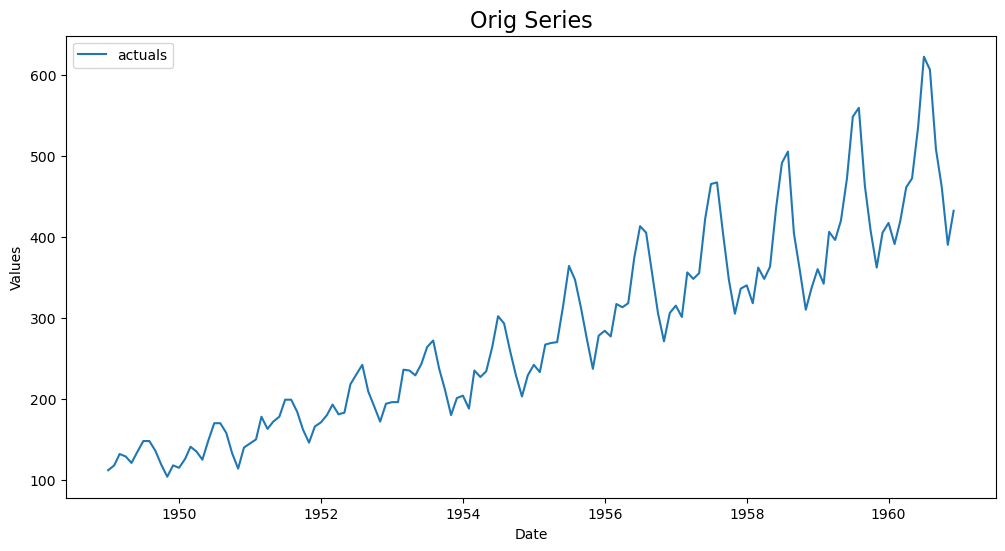

In [3]:
f = Forecaster(
    y=data['#Passengers'],
    current_dates=data['Month'],
    test_length = 12,
    future_dates = 12,
    cis = False,
)
f.plot()
plt.title('Orig Series',size=16)
plt.show()

In [4]:
f

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    N_actuals=144
    ForecastLength=12
    Xvars=[]
    TestLength=12
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    GridsFile=Grids
)

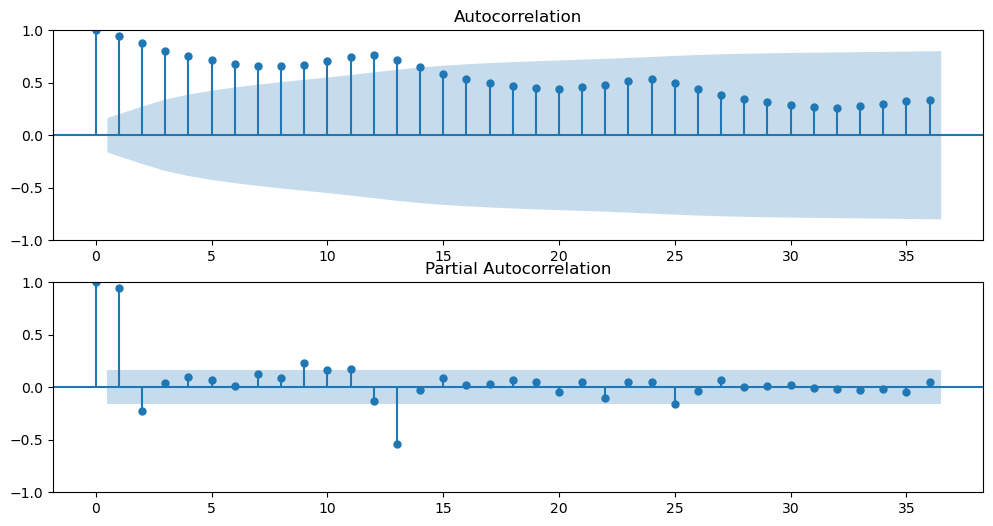

In [5]:
figs, axs = plt.subplots(2, 1,figsize=(12,6))
f.plot_acf(ax=axs[0],lags=36)
f.plot_pacf(ax=axs[1],lags=36,method='ywm')
plt.show()

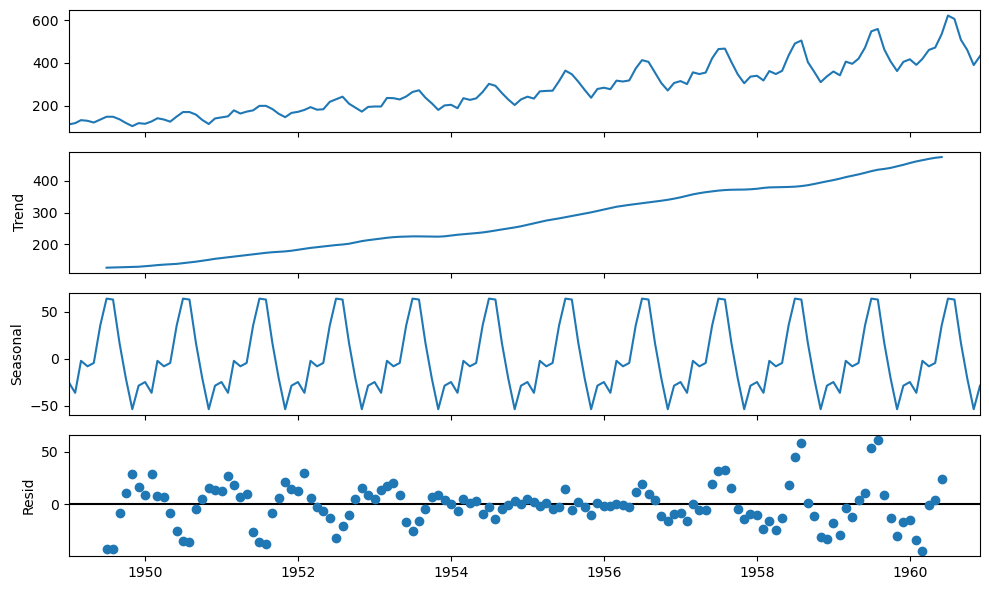

In [6]:
plt.rc("figure",figsize=(10,6))
f.seasonal_decompose().plot()
plt.show()

The below shows the results of the ADF test indicate the series is not stationary.

In [7]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: 0.82
the p-value is 0.9919
the series is not stationary
----------------------------------------------------------------------------------------------------


## LSTM Model

### Attempt 1
- Default parameters.

In [8]:
f.set_estimator('lstm')
f.manual_forecast(call_me='lstm_default')

5/5 [==============================] - 0s 2ms/step


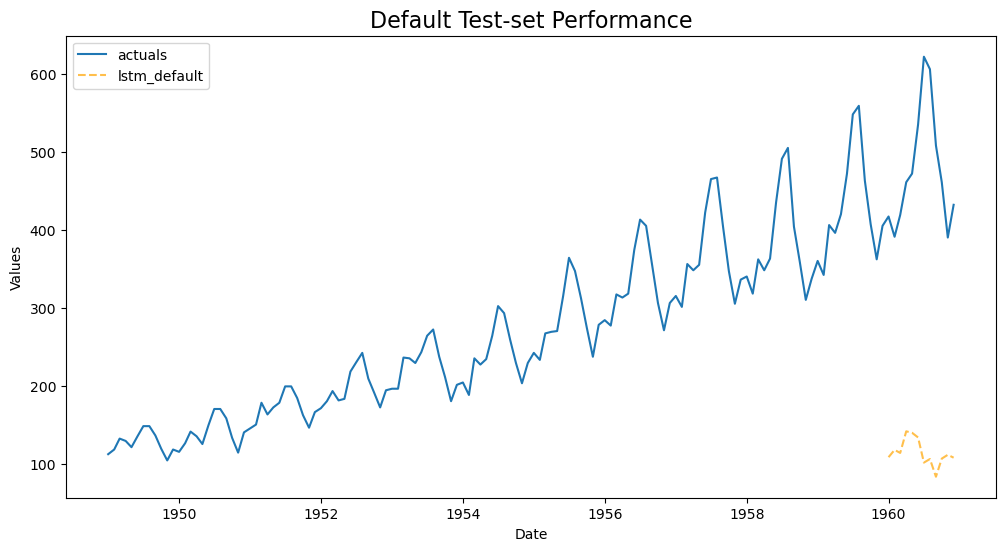

In [9]:
f.plot_test_set()
plt.title('Default Test-set Performance',size=16)
plt.show()

### Attempt 2
- Add more lags (2 years).

In [10]:
f.manual_forecast(call_me='lstm_24lags',lags=24)

4/4 [==============================] - 0s 3ms/step


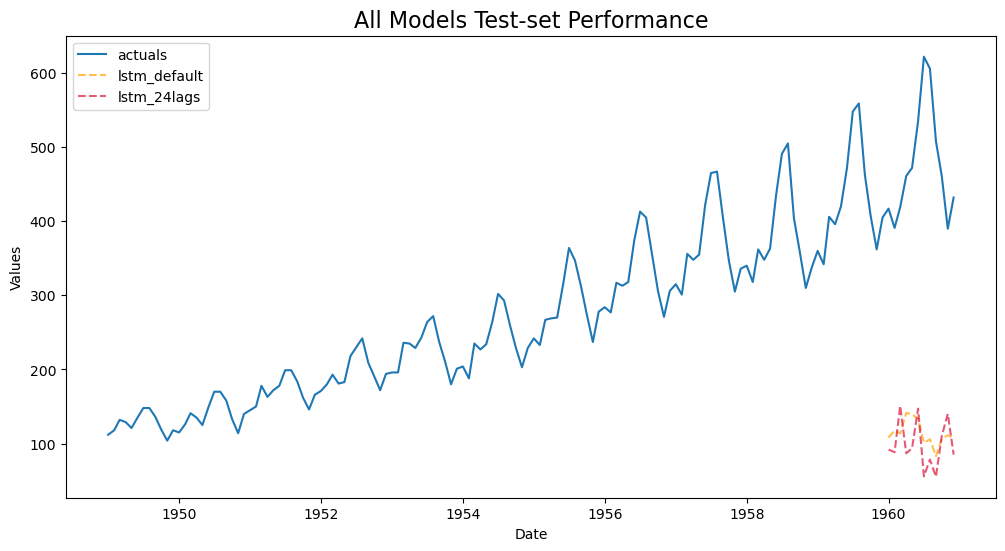

In [11]:
f.plot_test_set()
plt.title('All Models Test-set Performance',size=16)
plt.show()

### Attempt 3
- Add more epochs (5).

In [12]:
f.manual_forecast(call_me='lstm_24lags_5epochs',lags=24,epochs=5,validation_split=.2,shuffle=True)

Epoch 1/5
3/3 [==============================] - 2s 187ms/step - loss: 0.3532 - val_loss: 0.6353
Epoch 2/5
3/3 [==============================] - 0s 21ms/step - loss: 0.3475 - val_loss: 0.6276
Epoch 3/5
3/3 [==============================] - 0s 22ms/step - loss: 0.3418 - val_loss: 0.6200
Epoch 4/5
3/3 [==============================] - 0s 23ms/step - loss: 0.3361 - val_loss: 0.6125
Epoch 5/5
1/1 [==============================] - 0s 274ms/step
Epoch 1/5
3/3 [==============================] - 2s 235ms/step - loss: 0.3288 - val_loss: 0.6177
Epoch 2/5
3/3 [==============================] - 0s 28ms/step - loss: 0.3226 - val_loss: 0.6087
Epoch 3/5
3/3 [==============================] - 0s 24ms/step - loss: 0.3161 - val_loss: 0.5989
Epoch 4/5
3/3 [==============================] - 0s 23ms/step - loss: 0.3090 - val_loss: 0.5884
Epoch 5/5
4/4 [==============================] - 0s 6ms/step


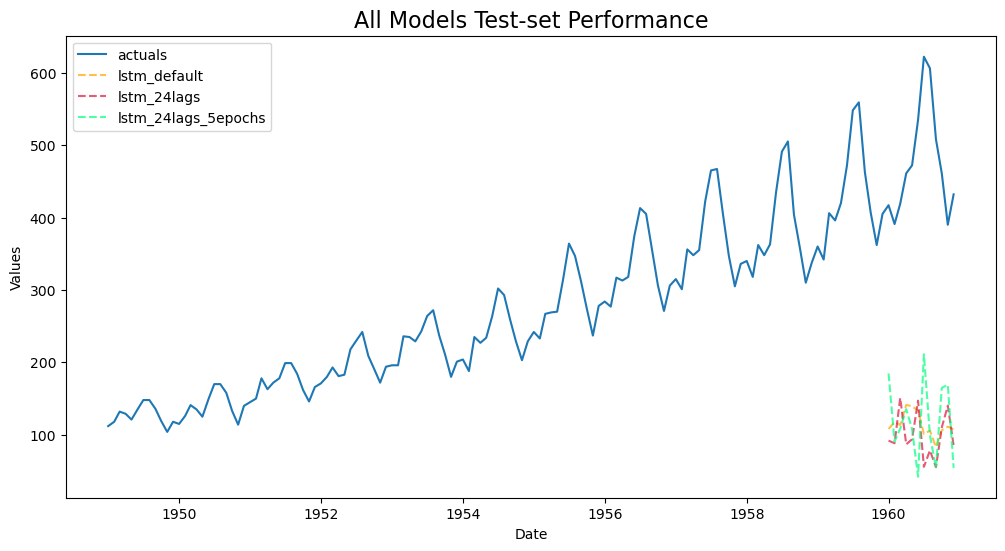

In [13]:
f.plot_test_set()
plt.title('All Models Test-set Performance',size=16)
plt.show()

### Attempt 4
- Add layers and early stoping.

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(
    call_me='lstm_24lags_earlystop_3layers',
    lags=24,
    epochs=25,
    validation_split=.2,
    shuffle=True,
    callbacks=EarlyStopping(
      monitor='val_loss',
      patience=5
    ),
    lstm_layer_sizes=(16,16,16),
    dropout=(0,0,0)
)

Epoch 1/25
3/3 [==============================] - 5s 542ms/step - loss: 0.3359 - val_loss: 0.5869
Epoch 2/25
3/3 [==============================] - 0s 38ms/step - loss: 0.3169 - val_loss: 0.5568
Epoch 3/25
3/3 [==============================] - 0s 37ms/step - loss: 0.2927 - val_loss: 0.5188
Epoch 4/25
3/3 [==============================] - 0s 38ms/step - loss: 0.2610 - val_loss: 0.4705
Epoch 5/25
3/3 [==============================] - 0s 31ms/step - loss: 0.2219 - val_loss: 0.4100
Epoch 6/25
3/3 [==============================] - 0s 33ms/step - loss: 0.1808 - val_loss: 0.3419
Epoch 7/25
3/3 [==============================] - 0s 33ms/step - loss: 0.1558 - val_loss: 0.2844
Epoch 8/25
3/3 [==============================] - 0s 31ms/step - loss: 0.1448 - val_loss: 0.2482
Epoch 9/25
3/3 [==============================] - 0s 43ms/step - loss: 0.1380 - val_loss: 0.2371
Epoch 10/25
3/3 [==============================] - 0s 39ms/step - loss: 0.1291 - val_loss: 0.2378
Epoch 11/25
3/3 [===========

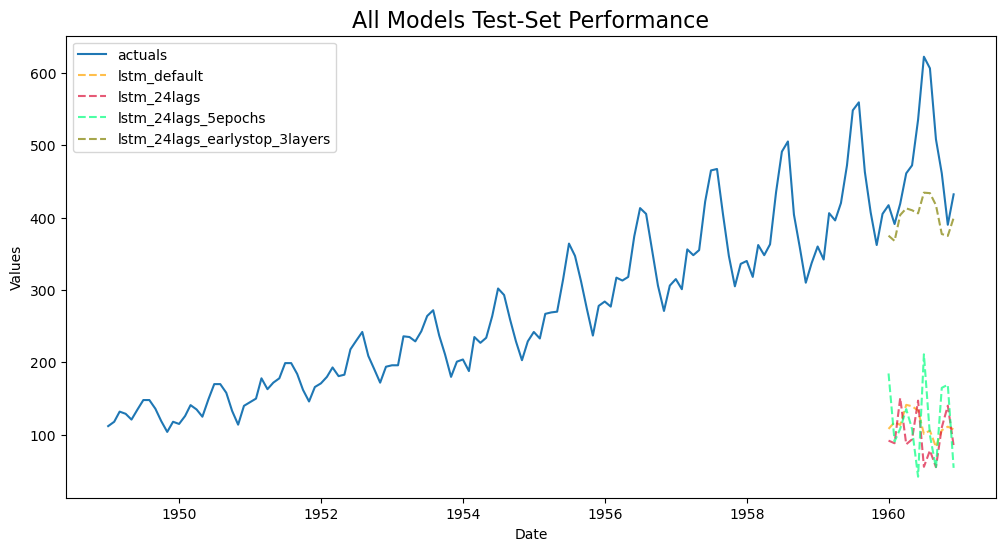

In [15]:
f.plot_test_set()
plt.title('All Models Test-Set Performance',size=16)
plt.show()

### Attempt 5
- Add more lags (3 years).

Epoch 1/15
3/3 [==============================] - 6s 614ms/step - loss: 0.3812 - val_loss: 0.4972
Epoch 2/15
3/3 [==============================] - 0s 68ms/step - loss: 0.2677 - val_loss: 0.2505
Epoch 3/15
3/3 [==============================] - 0s 67ms/step - loss: 0.1731 - val_loss: 0.1493
Epoch 4/15
3/3 [==============================] - 0s 70ms/step - loss: 0.0986 - val_loss: 0.1712
Epoch 5/15
3/3 [==============================] - 0s 60ms/step - loss: 0.0964 - val_loss: 0.1337
Epoch 6/15
3/3 [==============================] - 0s 67ms/step - loss: 0.0970 - val_loss: 0.1307
Epoch 7/15
3/3 [==============================] - 0s 67ms/step - loss: 0.0857 - val_loss: 0.1306
Epoch 8/15
3/3 [==============================] - 0s 63ms/step - loss: 0.0847 - val_loss: 0.1081
Epoch 9/15
3/3 [==============================] - 0s 65ms/step - loss: 0.0755 - val_loss: 0.1140
Epoch 10/15
3/3 [==============================] - 0s 68ms/step - loss: 0.0751 - val_loss: 0.1228
Epoch 11/15
3/3 [===========

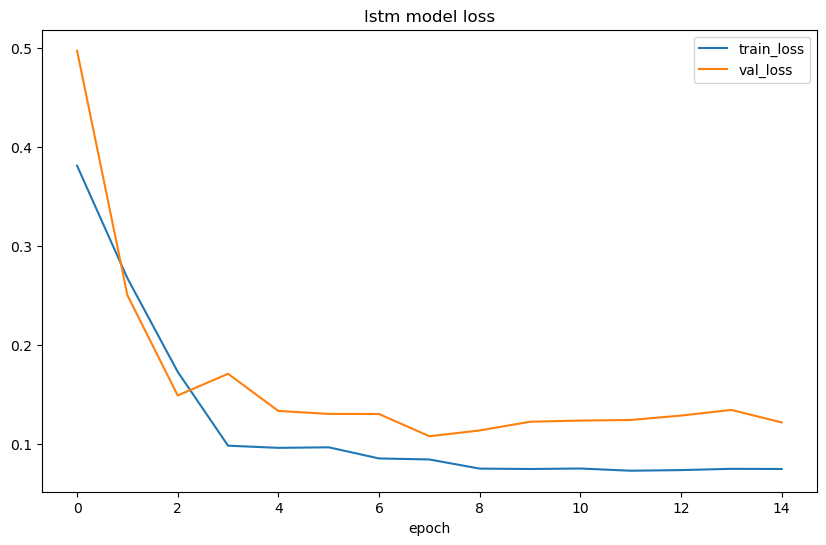

Epoch 1/15
3/3 [==============================] - 8s 645ms/step - loss: 0.3575 - val_loss: 0.5433
Epoch 2/15
3/3 [==============================] - 0s 83ms/step - loss: 0.2671 - val_loss: 0.2822
Epoch 3/15
3/3 [==============================] - 0s 83ms/step - loss: 0.1662 - val_loss: 0.1563
Epoch 4/15
3/3 [==============================] - 0s 82ms/step - loss: 0.0919 - val_loss: 0.2014
Epoch 5/15
3/3 [==============================] - 0s 81ms/step - loss: 0.0975 - val_loss: 0.1500
Epoch 6/15
3/3 [==============================] - 0s 80ms/step - loss: 0.0920 - val_loss: 0.1421
Epoch 7/15
3/3 [==============================] - 0s 82ms/step - loss: 0.0765 - val_loss: 0.1180
Epoch 8/15
3/3 [==============================] - 0s 84ms/step - loss: 0.0747 - val_loss: 0.1193
Epoch 9/15
3/3 [==============================] - 0s 92ms/step - loss: 0.0739 - val_loss: 0.1191
Epoch 10/15
3/3 [==============================] - 0s 85ms/step - loss: 0.0733 - val_loss: 0.1092
Epoch 11/15
3/3 [===========

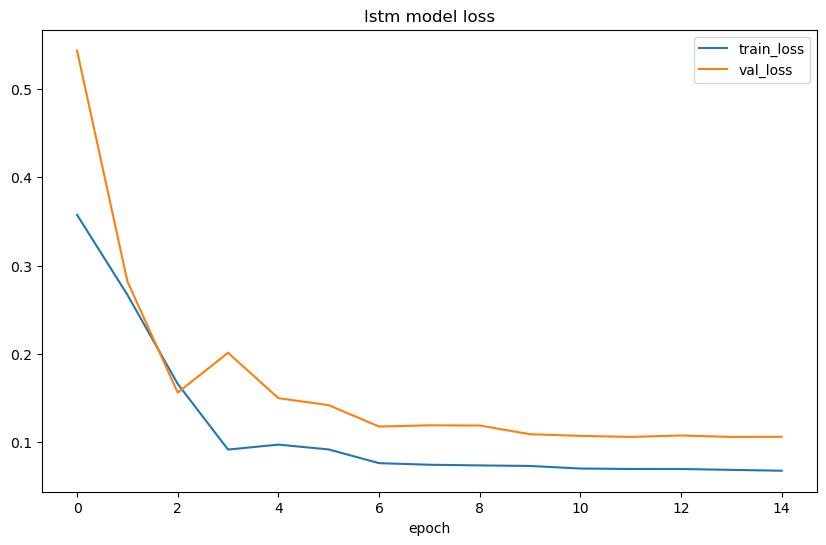

In [16]:
f.manual_forecast(
    call_me='lstm_24lags_4layers_15epochs',
    lags=36,
    batch_size=32,
    epochs=15,
    validation_split=.2,
    shuffle=True,
    activation='tanh',
    optimizer='Adam',
    learning_rate=0.001,
    lstm_layer_sizes=(72,)*4,
    dropout=(0,)*4,
    plot_loss=True
)

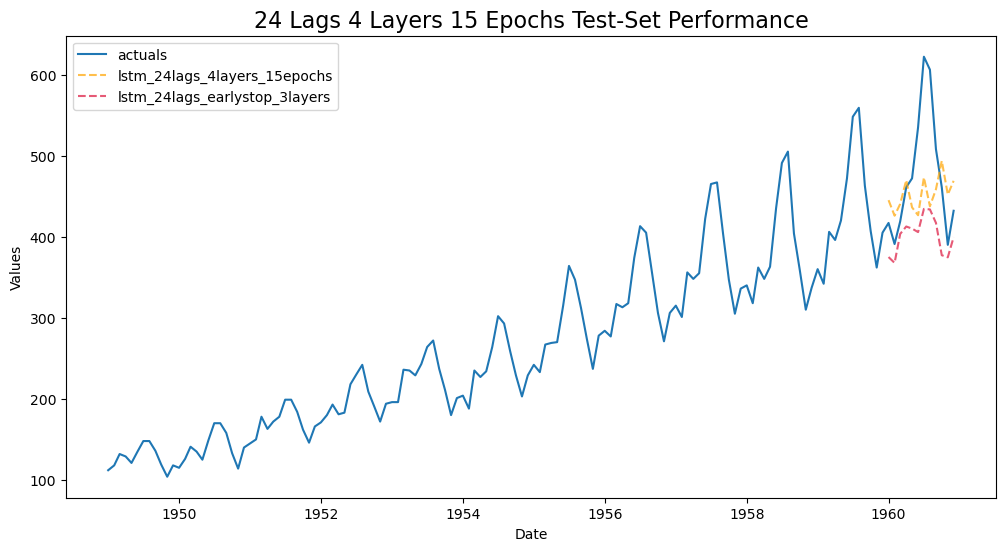

In [17]:
f.plot_test_set(order_by='TestSetRMSE',models='top_2')
plt.title('24 Lags 4 Layers 15 Epochs Test-Set Performance',size=16)
plt.show()

The last model run looks in the same ballpark as the actual series' trend, but still not great. Let's take things to the next level with this model by adding many more layers and training epochs.

### Attempt 6

Epoch 1/50
4/4 [==============================] - 5s 296ms/step - loss: 0.3232 - val_loss: 0.6441
Epoch 2/50
4/4 [==============================] - 0s 19ms/step - loss: 0.3119 - val_loss: 0.6298
Epoch 3/50
4/4 [==============================] - 0s 19ms/step - loss: 0.2991 - val_loss: 0.6125
Epoch 4/50
4/4 [==============================] - 0s 18ms/step - loss: 0.2841 - val_loss: 0.5912
Epoch 5/50
4/4 [==============================] - 0s 19ms/step - loss: 0.2661 - val_loss: 0.5644
Epoch 6/50
4/4 [==============================] - 0s 18ms/step - loss: 0.2451 - val_loss: 0.5304
Epoch 7/50
4/4 [==============================] - 0s 18ms/step - loss: 0.2220 - val_loss: 0.4881
Epoch 8/50
4/4 [==============================] - 0s 19ms/step - loss: 0.1991 - val_loss: 0.4382
Epoch 9/50
4/4 [==============================] - 0s 20ms/step - loss: 0.1790 - val_loss: 0.3853
Epoch 10/50
4/4 [==============================] - 0s 18ms/step - loss: 0.1650 - val_loss: 0.3362
Epoch 11/50
4/4 [===========

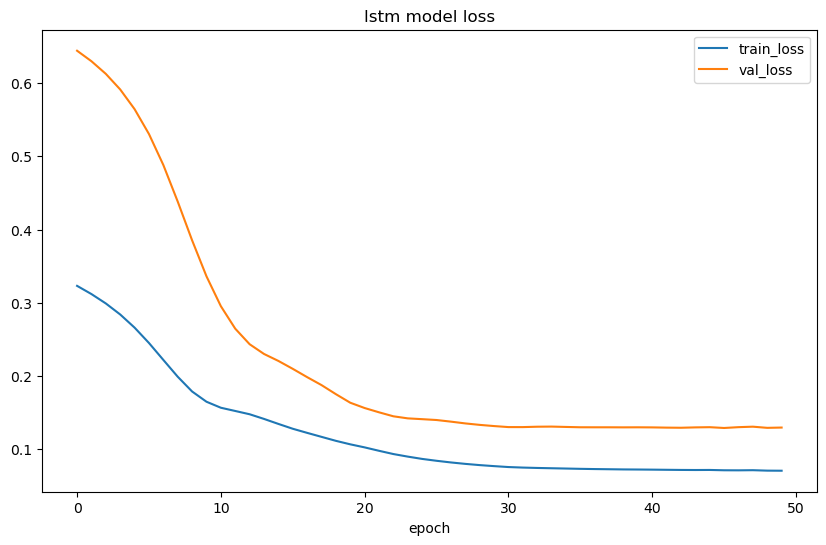

Epoch 1/50
4/4 [==============================] - 5s 323ms/step - loss: 0.3084 - val_loss: 0.6550
Epoch 2/50
4/4 [==============================] - 0s 19ms/step - loss: 0.2974 - val_loss: 0.6409
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 0.2846 - val_loss: 0.6238
Epoch 4/50
4/4 [==============================] - 0s 17ms/step - loss: 0.2695 - val_loss: 0.6024
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 0.2511 - val_loss: 0.5752
Epoch 6/50
4/4 [==============================] - 0s 17ms/step - loss: 0.2289 - val_loss: 0.5401
Epoch 7/50
4/4 [==============================] - 0s 17ms/step - loss: 0.2037 - val_loss: 0.4959
Epoch 8/50
4/4 [==============================] - 0s 17ms/step - loss: 0.1766 - val_loss: 0.4419
Epoch 9/50
4/4 [==============================] - 0s 16ms/step - loss: 0.1527 - val_loss: 0.3817
Epoch 10/50
4/4 [==============================] - 0s 17ms/step - loss: 0.1369 - val_loss: 0.3250
Epoch 11/50
4/4 [===========

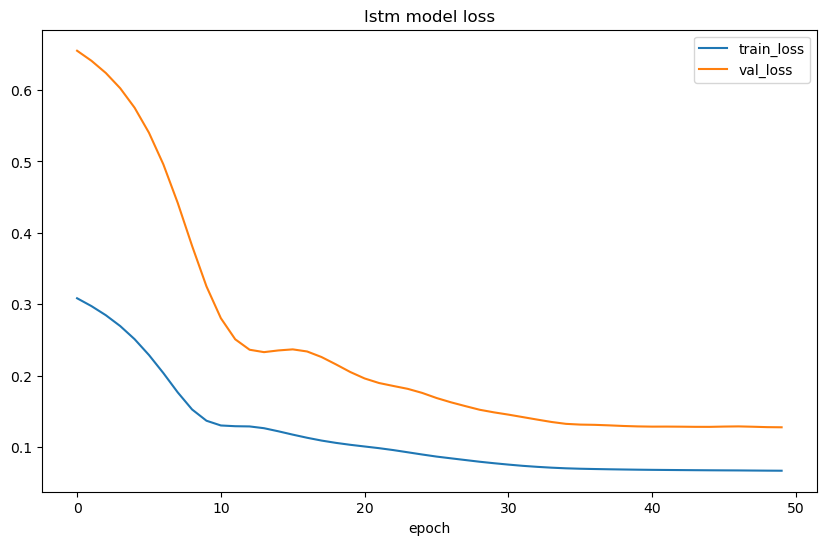

In [18]:
f.manual_forecast(
    call_me='lstm_best',
    lags=6,
    epochs=50,
    validation_split=.1,
    shuffle=False,
    activation='tanh',
    optimizer='Adam',
    learning_rate=0.001,
    lstm_layer_sizes=(15,)*3,
    dropout=(0,)*3,
    plot_loss=True,
)

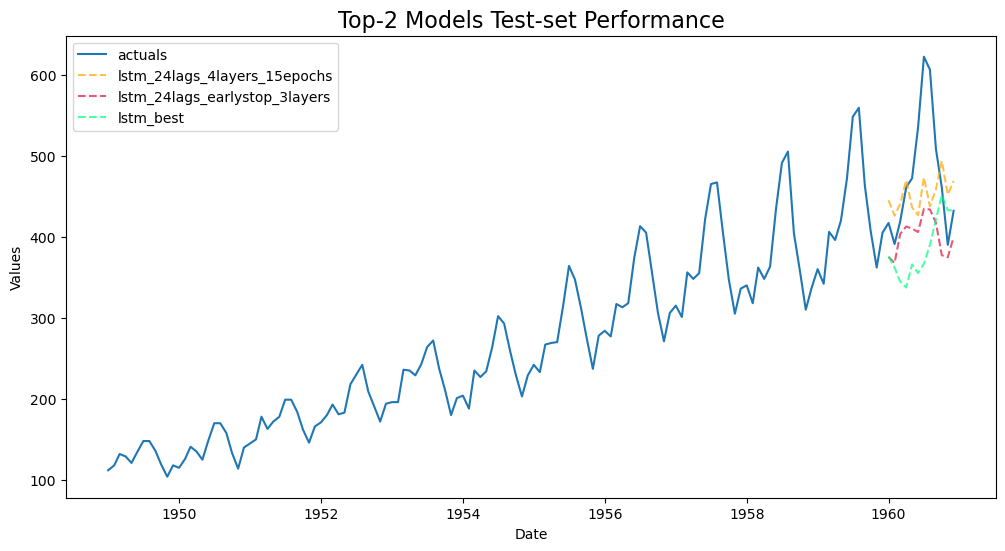

In [19]:
f.plot_test_set(order_by='TestSetRMSE',models='top_3')
plt.title('Top-2 Models Test-set Performance',size=16)
plt.show()

Finally, an LSTM model that looks somewhat believable, but it took a lot of work and took a long time to evaluate. Let's see if we can outpace this performance with a simple linear regression model.

## Prepare Forecast for MLR
- Test length already set
- Forecast horizon already set
- Add lags (24) - for MLR, these are added as regressors, not specified when calling the model (unlike LSTM)
- Add seasonal regressors (month, quarter - using dummy vars)
- Add year variable
- Add time trend
- Difference data since it is not stationary

In [20]:
f.drop_all_Xvars()

In [21]:
from scalecast.SeriesTransformer import SeriesTransformer

transformer = SeriesTransformer(f,deepcopy=False)
f = transformer.DiffTransform()

f.add_ar_terms(24)
f.add_seasonal_regressors('month',dummy=True)

## MLR Modeling

In [22]:
f.set_estimator('mlr')
f.manual_forecast()

In [23]:
f = transformer.DiffRevert(
    exclude_models = [m for m in f.history if m != 'mlr']
) # exclude all lstm models already called from the revert

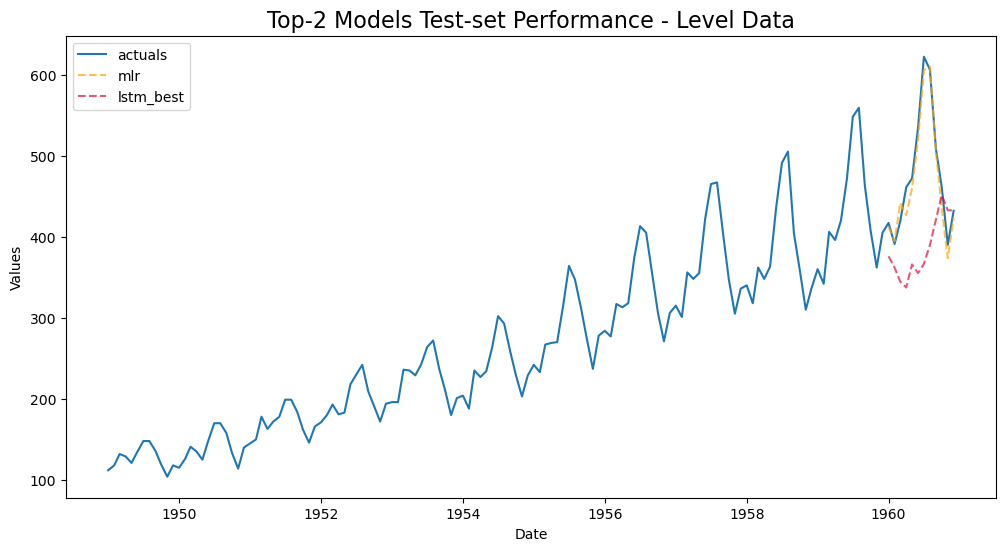

In [24]:
f.plot_test_set(order_by='TestSetRMSE',models=['lstm_best','mlr'])
plt.title('Top-2 Models Test-set Performance - Level Data',size=16)
plt.show()

It is obvious that with much less work, we find a significantly better model. LSTM is not always suited for small datasets.

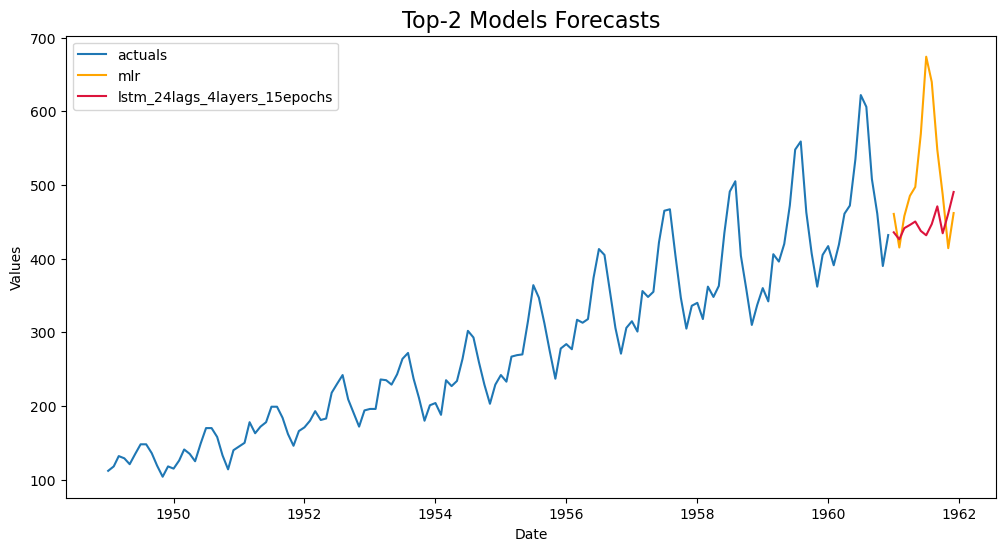

In [25]:
f.plot(order_by='TestSetRMSE',models='top_2')
plt.title('Top-2 Models Forecasts',size=16)
plt.show()

## Benchmarking

In [26]:
f.export('model_summaries',determine_best_by='TestSetRMSE')[
    ['ModelNickname','TestSetRMSE','TestSetR2','best_model']
]

,ModelNickname,TestSetRMSE,TestSetR2,best_model
0,mlr,16.929778,0.948259,True
1,lstm_24lags_4layers_15epochs,78.984989,-0.126214,False
2,lstm_24lags_earlystop_3layers,94.410765,-0.609069,False
3,lstm_best,125.283811,-1.833489,False
4,lstm_24lags_5epochs,368.811948,-23.555092,False
5,lstm_default,370.608692,-23.794926,False
6,lstm_24lags,388.620988,-26.263657,False


## Export Results

### Export forecasts

In [27]:
results = f.export(['lvl_fcsts','lvl_test_set_predictions'],models=['mlr','lstm_best'])
results['lvl_fcsts']

,DATE,mlr,lstm_best
0,1961-01-01,460.692736,402.768716
1,1961-02-01,415.111191,402.273139
2,1961-03-01,457.812493,378.765374
3,1961-04-01,485.170102,416.287240
4,1961-05-01,497.247526,396.668177
5,1961-06-01,569.466872,405.977299
6,1961-07-01,674.040142,397.832049
7,1961-08-01,639.727006,424.395532
8,1961-09-01,547.553936,449.289192
9,1961-10-01,486.825533,471.030771


### Export test-set preds

In [28]:
results['lvl_test_set_predictions']

,DATE,actual,mlr,lstm_best
0,1960-01-01,417.0,412.327552,375.882147
1,1960-02-01,391.0,394.228643,362.010236
2,1960-03-01,419.0,441.667413,344.655153
3,1960-04-01,461.0,426.435302,337.357565
4,1960-05-01,472.0,459.840137,365.839379
5,1960-06-01,535.0,519.990278,355.106947
6,1960-07-01,622.0,605.600979,366.597712
7,1960-08-01,606.0,610.016413,389.864925
8,1960-09-01,508.0,504.561604,421.295129
9,1960-10-01,461.0,435.009743,451.414537


### Export Feature Info
- For MLR only

In [29]:
f.save_feature_importance()
f.export_feature_importance('mlr')

,weight,std
feature,,
AR1,0.068455,0.037643
AR11,0.054515,0.008895
AR10,0.051991,0.018820
AR21,0.029139,0.018780
AR22,0.026685,0.007115
AR7,0.011977,0.005519
month_10,0.010763,0.002053
AR18,0.009343,0.012560
AR13,0.007198,0.023696
